In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.linear_model import LogisticRegression
import scipy.stats as sps
%matplotlib inline
from matplotlib import pylab
pylab.rcParams['figure.figsize']=(12,12)

def shuffler(filename):
    """
    Read into dataframe and shuffle
    """
    df = pd.read_csv(filename, header=0)
    # return the pandas dataframe
    return df.reindex(np.random.permutation(df.index))

In [200]:
phot_df_raw = shuffler('phot_ext_rgilmore.csv')
phot_df_raw.shape

(88943, 370)

# Data Preparation

In [201]:
# Apply some cuts on the data
#Nonphysical model outputs
phot_df = phot_df_raw[phot_df_raw['deVRad_r']>=0.0]
phot_df = phot_df[phot_df['expRad_g']>=0.0]
phot_df = phot_df[phot_df['expAB_g']>=0.]
phot_df = phot_df[phot_df['deVAB_z']>=0.]


# Redshift limits
phot_df = phot_df[(phot_df.z<0.5) & (phot_df.z>0.0)] 



# Remove high extinction cases
phot_df = phot_df[phot_df.extinction_u<=0.5]

# Nonphysical flux params within models
phot_df = phot_df[(phot_df.aperFlux7_g>0)\
                  &(phot_df.cModelFlux_g>0)\
                  &(phot_df.expFlux_u>0)\
                  &(phot_df.modelFlux_u>0)] #check that no negative linear flux params appear
phot_df.reset_index(inplace=True)
phot_df.shape

(85365, 371)

In [202]:
# Extinction corrections to flux

flux_col_lst = [col_name for col_name in phot_df.columns if 'Flux' in col_name]
#print flux_col_list
#print phot_df[flux_col_list][0:10]
             
for flux_col in flux_col_lst:
    band = flux_col[-1]
    phot_df[flux_col+'_ext_cor']=phot_df[flux_col]*2.5**phot_df['extinction_'+band]

In [203]:
phot_df[['psfFlux_u','psfFlux_u_ext_cor','extinction_u']][0:3]

,psfFlux_u,psfFlux_u_ext_cor,extinction_u
0,2.324170,2.841877,0.219474
1,5.140821,7.612387,0.428427
2,17.355680,19.121957,0.105771


In [204]:
# Extinction corrections to magnitude measurements

mag_col_lst = [col_name for col_name in phot_df.columns if 'Mag' in col_name and 'Err' not in col_name]

             
for mag_col in mag_col_lst:
    band = mag_col[-1]
    phot_df[mag_col+'_ext_cor']=phot_df[mag_col]-phot_df['extinction_'+band]
    

In [205]:
phot_df[['deVMag_u','deVMag_u_ext_cor','extinction_u']][0:3]

,deVMag_u,deVMag_u_ext_cor,extinction_u
0,19.98888,19.769406,0.219474
1,18.69068,18.262253,0.428427
2,16.36583,16.260058,0.105771


In [206]:
# remove unextincted columns
print len(phot_df.columns)
for flux_col in flux_col_lst:
    phot_df.drop(flux_col,inplace=True,axis=1)
    
for mag_col in mag_col_lst:
    phot_df.drop(mag_col,inplace=True,axis=1)
print len(phot_df.columns)

501
371


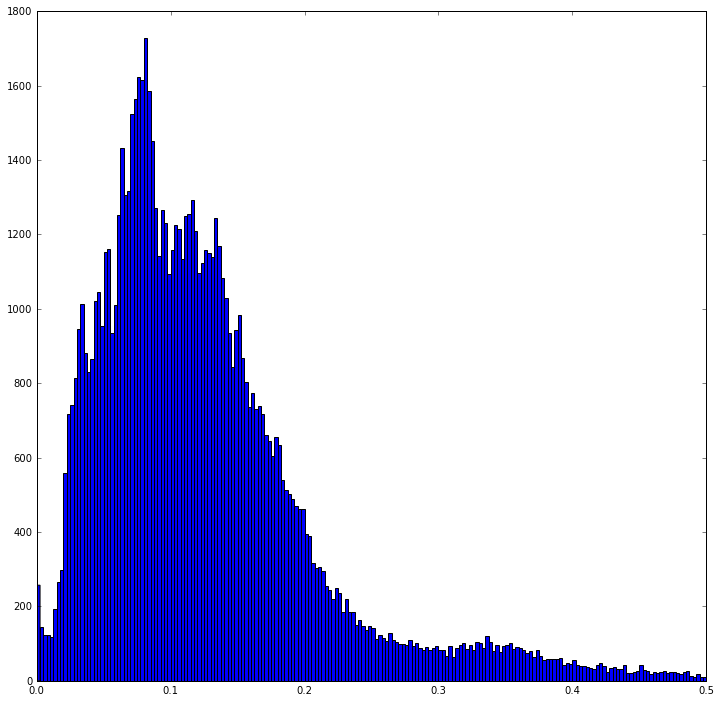

In [207]:
#redshift (distance) distro of galaxy targets
xx=plt.hist(phot_df.z,200)

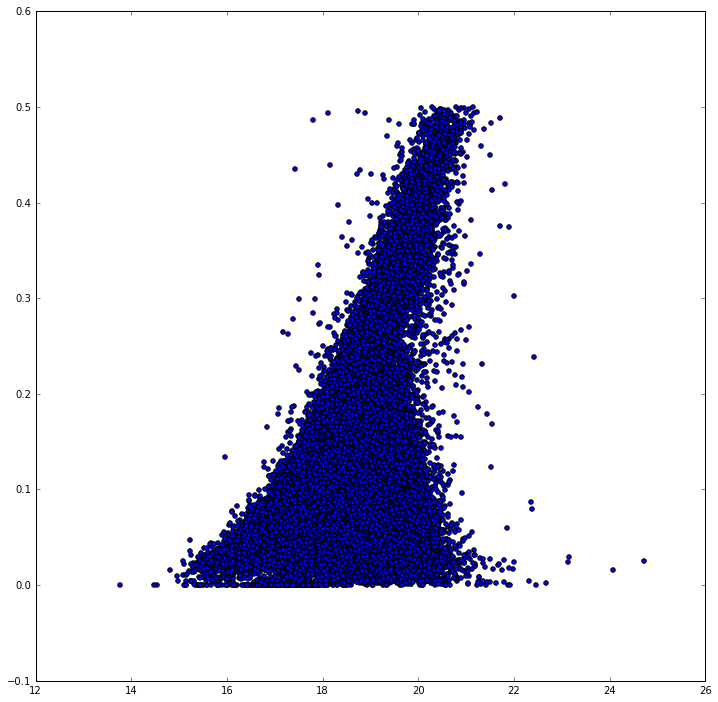

In [210]:
#xx=plt.hist(phot_df.petroMag_r,100)
xx = plt.scatter(phot_df.psfMag_r_ext_cor,phot_df.z)

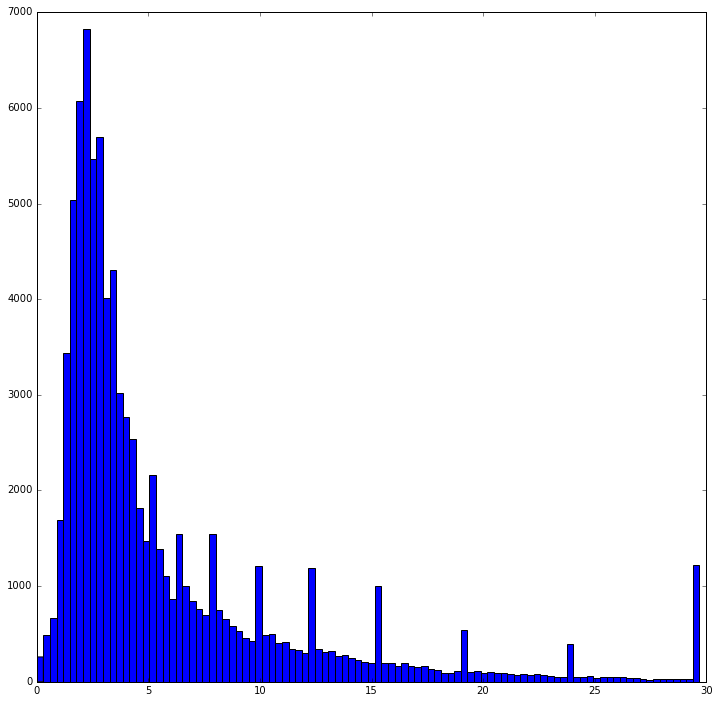

In [211]:
#radius fit distro
xx=plt.hist(phot_df.deVRad_g,100)


In [212]:
phot_df[['deVRad_r','p_el', 'p_cw', 'p_acw', 'p_edge', 'p_dk', 'p_mg', 'p_cs']]


,deVRad_r,p_el,p_cw,p_acw,p_edge,p_dk,p_mg,p_cs
0,1.517711,0.847,0.008,0.000,0.046,0.087,0.011,0.055
1,4.107414,0.620,0.016,0.010,0.269,0.062,0.023,0.295
2,22.838450,0.020,0.008,0.008,0.913,0.005,0.046,0.929
3,2.411747,0.899,0.000,0.005,0.041,0.054,0.000,0.047
4,4.725880,0.963,0.003,0.000,0.020,0.015,0.000,0.022
5,29.671060,0.113,0.015,0.388,0.154,0.180,0.149,0.558
6,1.465587,0.583,0.010,0.020,0.064,0.094,0.230,0.094
7,2.124445,0.397,0.000,0.022,0.070,0.392,0.119,0.092
8,0.752159,0.935,0.002,0.007,0.020,0.036,0.000,0.029
9,1.612980,0.811,0.003,0.008,0.034,0.127,0.018,0.044


(-0.35639567665324889, 0.0)


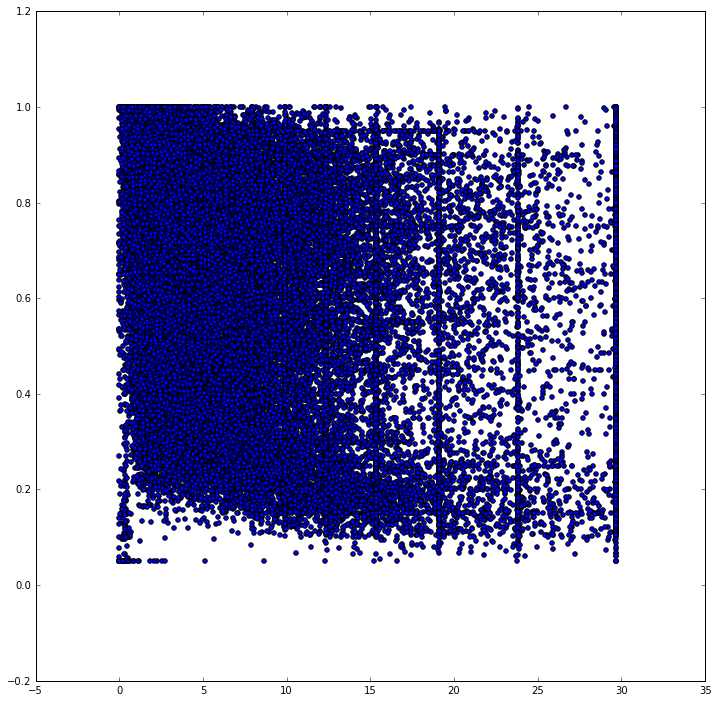

In [213]:
x,y = phot_df['deVRad_g'],phot_df['deVAB_i']
print sps.pearsonr(x,y)
plt.scatter(x,y)

# Logistic Regression

In [214]:
# For the first modeling attempt, let's identify a subset of parameters which are highly correlated with the target
# variables
res=[]
for col in phot_df.columns:
    if 'p_' not in col: res.append([col]+list(sps.pearsonr(phot_df.p_cs,phot_df[col]))) #all independent vars

out = sorted(res,key=lambda x:np.absolute(x[1]),reverse=True)
for item in out[0:50]:
    print item  #variables sorted by declining correlation
    #if 'p_' not in item[0]: print item

['deVRad_g', 0.72697382033133828, 0.0]
['deVRad_r', 0.69263060921868835, 0.0]
['deVRad_i', 0.67852878609926215, 0.0]
['deVRad_z', 0.67444338949538984, 0.0]
['fracDeV_g', -0.66555127811401193, 0.0]
['fracDeV_r', -0.65412898164934241, 0.0]
['fracDeV_i', -0.63377377936897428, 0.0]
['expRad_g', 0.62432872211784951, 0.0]
['expRad_r', 0.58603216465985009, 0.0]
['fracDeV_z', -0.58069624750199211, 0.0]
['expRad_i', 0.57649779553643021, 0.0]
['expRad_z', 0.57515337988697657, 0.0]
['fracDeV_u', -0.55719004524555305, 0.0]
['expAB_i', -0.54583176683460988, 0.0]
['expAB_z', -0.54525159464598594, 0.0]
['expAB_r', -0.54340837935255559, 0.0]
['expAB_g', -0.52923958432893337, 0.0]
['deVAB_z', -0.52550665088868109, 0.0]
['deVAB_i', -0.52391789795700761, 0.0]
['deVAB_r', -0.5210762817024932, 0.0]
['deVRad_u', 0.50941131249218652, 0.0]
['deVAB_g', -0.50393881864144929, 0.0]
['deVMag_u_ext_cor', -0.49334667573966728, 0.0]
['expMag_u_ext_cor', -0.48821692671485944, 0.0]
['expFluxIvar_z_ext_cor', -0.43582949

In [215]:
# First attempt at a 2-category classifier: can we distinguish elliptical from non-ellipticals?

input_set = [item[0] for item in out[0:50] if 'p_' not in item[0]]
test_size = 10000

lm = LogisticRegression()
X = np.array(phot_df[input_set][test_size:])
y = np.array(phot_df['p_el'].apply(lambda x:int(x>0.8)))[test_size:]
X_pred = np.array(phot_df[input_set][:test_size])
y_pred = np.array(phot_df['p_el'].apply(lambda x:int(x>0.8)))[:test_size]
lm.fit(X,y)
res_df = phot_df[input_set][0:test_size-1] 
res_df['actual'] = pd.Series(y_pred)
res_df['pred'] = pd.Series(lm.predict(phot_df[input_set][0:test_size]))
res_df['cor'] = res_df.apply(lambda row:int(row['actual']==row['pred']),axis=1)


In [216]:
# Results here are encouraging, nearly 90% of the 10000-case sample classified correctly
print sum(res_df['actual']),sum(res_df['pred']),sum(res_df['cor'])
res_df

4484 4765 8890


,deVRad_g,deVRad_r,deVRad_i,deVRad_z,fracDeV_g,fracDeV_r,fracDeV_i,expRad_g,expRad_r,fracDeV_z,...,deVFluxIvar_r_ext_cor,petroRad_r,petroRad_g,cModelMag_g_ext_cor,petroMag_g_ext_cor,deVFlux_u_ext_cor,cModelFluxIvar_z_ext_cor,actual,pred,cor
0,1.728785,1.517711,1.465181,1.326051,1.000000,1.000000,1.000000,1.154922,0.976796,1.000000,...,3.394670,4.025299,4.201224,18.558723,18.613333,12.350988,0.160862,1,1,1
1,4.181826,4.107414,3.961061,3.870646,0.235346,0.355901,0.483070,2.476509,2.403178,0.526836,...,1.026858,4.568731,4.622144,17.201297,17.264497,49.455020,0.057013,0,0,1
2,23.819670,22.838450,21.889900,22.135200,0.361283,0.399754,0.361627,9.888969,9.853354,0.551274,...,0.081921,19.820870,19.362500,15.432714,15.466114,313.155039,0.005777,0,0,1
3,2.518771,2.411747,2.255612,2.262841,1.000000,1.000000,1.000000,1.571184,1.552535,1.000000,...,1.466880,4.839142,5.057450,17.621844,17.722124,21.054933,0.081009,1,1,1
4,5.009267,4.725880,4.855823,4.295127,1.000000,1.000000,1.000000,3.220652,3.187852,1.000000,...,0.060259,7.583631,7.979043,14.850887,14.986287,219.746144,0.007724,1,1,1
5,28.540820,29.671060,29.669700,28.081940,0.000000,0.068532,0.064841,7.919745,7.776563,0.000000,...,0.029683,14.731350,14.514150,16.402078,16.487098,121.976458,0.005932,0,0,1
6,1.738461,1.465587,1.436083,1.369252,0.970094,0.867556,0.969815,1.207278,1.003380,0.927120,...,3.066909,3.013623,3.276975,18.186555,18.345745,12.131756,0.172794,0,1,0
7,2.363812,2.124445,1.819707,2.160350,1.000000,1.000000,1.000000,1.824759,1.289041,0.682756,...,5.080044,4.576498,2.970078,20.965963,21.105643,6.517356,0.139175,0,0,1
8,0.739499,0.752159,0.706582,0.903913,0.393051,0.558088,0.573683,0.877201,0.878099,0.762039,...,1.394368,2.430547,2.475295,17.445467,17.487757,12.055666,0.093135,1,1,1
9,1.492923,1.612980,1.576224,1.201982,1.000000,1.000000,1.000000,0.975676,0.990665,1.000000,...,3.746188,4.273480,4.554759,18.892194,18.880214,3.399275,0.146693,1,1,1


In [217]:
# We can code up a transition-matrix to look at counts predicted vs actual
imax = max(res_df.actual)
rep = np.zeros((imax+1,imax+1),dtype=np.int32)
for i in range(len(res_df)):
    rep[res_df.actual[i]][res_df.pred[i]]+=1
pd.DataFrame(rep) #rows are actual class, columns are predicted

,0,1
0,4820,695
1,414,4070


In [218]:
ycols = [col for col in phot_df.columns if 'p_' in col[:2]]

In [219]:
input_set = [item[0] for item in out[0:50] if 'p_' not in item[0][:2]]
test_size = 10000

ycols = [col for col in phot_df.columns if 'p_' in col[:2]]
def gal_class(row):
    for item in ycols:
        if row[item]>0.8:return item 
    return None

phot_df['gal_class'] = phot_df.apply(gal_class,axis=1)
mod_df = phot_df[phot_df.gal_class!=None]
len(mod_df)

lm = LogisticRegression()
X = np.array(phot_df[input_set][test_size:])
y = np.array(phot_df['p_el'].apply(lambda x:int(x>0.8)))[test_size:]
X_pred = np.array(phot_df[input_set][:test_size])
y_pred = np.array(phot_df['p_el'].apply(lambda x:int(x>0.8)))[:test_size]
lm.fit(X,y)
res_df = phot_df[input_set][0:test_size-1] 
res_df['actual'] = pd.Series(y_pred)
res_df['pred'] = pd.Series(lm.predict(phot_df[input_set][0:test_size]))
res_df['cor'] = res_df.apply(lambda row:int(row['actual']==row['pred']),axis=1)
print sum(res_df['actual']),sum(res_df['pred']),sum(res_df['cor'])
res_df

4484 4758 8873


,deVRad_g,deVRad_r,deVRad_i,deVRad_z,fracDeV_g,fracDeV_r,fracDeV_i,expRad_g,expRad_r,fracDeV_z,...,deVFluxIvar_r_ext_cor,petroRad_r,petroRad_g,cModelMag_g_ext_cor,petroMag_g_ext_cor,deVFlux_u_ext_cor,cModelFluxIvar_z_ext_cor,actual,pred,cor
0,1.728785,1.517711,1.465181,1.326051,1.000000,1.000000,1.000000,1.154922,0.976796,1.000000,...,3.394670,4.025299,4.201224,18.558723,18.613333,12.350988,0.160862,1,1,1
1,4.181826,4.107414,3.961061,3.870646,0.235346,0.355901,0.483070,2.476509,2.403178,0.526836,...,1.026858,4.568731,4.622144,17.201297,17.264497,49.455020,0.057013,0,0,1
2,23.819670,22.838450,21.889900,22.135200,0.361283,0.399754,0.361627,9.888969,9.853354,0.551274,...,0.081921,19.820870,19.362500,15.432714,15.466114,313.155039,0.005777,0,0,1
3,2.518771,2.411747,2.255612,2.262841,1.000000,1.000000,1.000000,1.571184,1.552535,1.000000,...,1.466880,4.839142,5.057450,17.621844,17.722124,21.054933,0.081009,1,1,1
4,5.009267,4.725880,4.855823,4.295127,1.000000,1.000000,1.000000,3.220652,3.187852,1.000000,...,0.060259,7.583631,7.979043,14.850887,14.986287,219.746144,0.007724,1,1,1
5,28.540820,29.671060,29.669700,28.081940,0.000000,0.068532,0.064841,7.919745,7.776563,0.000000,...,0.029683,14.731350,14.514150,16.402078,16.487098,121.976458,0.005932,0,0,1
6,1.738461,1.465587,1.436083,1.369252,0.970094,0.867556,0.969815,1.207278,1.003380,0.927120,...,3.066909,3.013623,3.276975,18.186555,18.345745,12.131756,0.172794,0,1,0
7,2.363812,2.124445,1.819707,2.160350,1.000000,1.000000,1.000000,1.824759,1.289041,0.682756,...,5.080044,4.576498,2.970078,20.965963,21.105643,6.517356,0.139175,0,0,1
8,0.739499,0.752159,0.706582,0.903913,0.393051,0.558088,0.573683,0.877201,0.878099,0.762039,...,1.394368,2.430547,2.475295,17.445467,17.487757,12.055666,0.093135,1,1,1
9,1.492923,1.612980,1.576224,1.201982,1.000000,1.000000,1.000000,0.975676,0.990665,1.000000,...,3.746188,4.273480,4.554759,18.892194,18.880214,3.399275,0.146693,1,1,1


# Multinomial classifier

In [220]:
# Now, let's attempt to distinguish elliptical, face on- and edge on-spirals, and mergers in a single model, using 
# the softmax regression feature in sklearn's Logistic Regression package.  Our target variables will now be
# integer representations of the possible classes:
# 
# 0 - Ellipticals
# 1 - Spirals (face-on)
# 2 - Spirals (edge-on)
# 3 - Mergers


input_set = [item[0] for item in out[0:30] if 'p_' not in item[0][:2]]
test_size = 10000

ycols = [col for col in phot_df.columns if 'p_' in col[:2]]
def gal_class(row):
    gc_dict = {'p_el':0, 'p_cw':1, 'p_acw':1, 'p_edge':2, 'p_dk':None, 'p_mg':3} #dictionary for our classification
    for item in gc_dict:
        if row[item]>0.65: return gc_dict[item]
    return None

phot_df['gal_class'] = phot_df.apply(gal_class,axis=1)
mod_df = phot_df[phot_df.gal_class.notnull()].reset_index()
print len(mod_df)
#print mod_df[ycols+['gal_class']]
lm = LogisticRegression(multi_class='multinomial',solver='lbfgs')
X = np.array(mod_df[input_set][test_size:])
y = np.array(mod_df['gal_class'])[test_size:]
X_pred = np.array(mod_df[input_set][:test_size])
y_pred = np.array(mod_df['gal_class'])[:test_size]


lm.fit(X,y)
res_df = mod_df[input_set][0:test_size-1]

res_df['actual'] = pd.Series(y_pred)
res_df['pred'] = pd.Series(lm.predict(mod_df[input_set][0:test_size]))
res_df['cor'] = res_df.apply(lambda row:int(row['actual']==row['pred']),axis=1)
print sum(res_df['actual']),sum(res_df['pred']),sum(res_df['cor'])
print 'Overall correct fraction = ',sum(res_df['cor'])/float(test_size)
res_df

65787
3294.0 2497.0 8919
Overall correct fraction =  0.8919


,deVRad_g,deVRad_r,deVRad_i,deVRad_z,fracDeV_g,fracDeV_r,fracDeV_i,expRad_g,expRad_r,fracDeV_z,...,expMag_u_ext_cor,expFluxIvar_z_ext_cor,lnLDeV_g,deVMag_g_ext_cor,modelMag_u_ext_cor,expFluxIvar_g_ext_cor,lnLDeV_r,actual,pred,cor
0,1.728785,1.517711,1.465181,1.326051,1.000000,1.000000,1.000000,1.154922,0.976796,1.000000,...,20.345056,0.334388,-0.119515,18.558723,20.373336,15.492868,-23.613050,0,0,1
1,23.819670,22.838450,21.889900,22.135200,0.361283,0.399754,0.361627,9.888969,9.853354,0.551274,...,16.838949,0.012634,-2986.795000,15.158564,16.212968,0.394885,-2860.418000,2,1,0
2,2.518771,2.411747,2.255612,2.262841,1.000000,1.000000,1.000000,1.571184,1.552535,1.000000,...,19.622452,0.154162,-11.587460,17.621844,19.560182,6.808761,-56.509050,0,0,1
3,5.009267,4.725880,4.855823,4.295127,1.000000,1.000000,1.000000,3.220652,3.187852,1.000000,...,17.114681,0.013535,-1640.760000,14.850887,16.689201,0.344826,-2572.200000,0,0,1
4,0.739499,0.752159,0.706582,0.903913,0.393051,0.558088,0.573683,0.877201,0.878099,0.762039,...,19.813183,0.114466,-831.686200,17.419977,19.640933,5.566827,-1760.635000,0,0,1
5,1.492923,1.612980,1.576224,1.201982,1.000000,1.000000,1.000000,0.975676,0.990665,1.000000,...,21.235628,0.257004,-8.172819,18.892194,20.878288,22.362193,-27.689200,0,0,1
6,2.155897,1.712611,1.582015,1.531704,1.000000,1.000000,1.000000,1.222798,0.995637,1.000000,...,22.221434,0.391688,-2.619763,20.301165,22.809924,28.990122,-3.330751,0,0,1
7,2.952246,2.744711,2.678900,2.786207,1.000000,1.000000,1.000000,1.888377,1.602597,1.000000,...,19.578703,0.106812,-113.165900,17.515616,19.451163,6.006325,-274.832900,0,0,1
8,2.351207,1.886515,1.878469,1.732734,1.000000,1.000000,1.000000,1.499989,1.237036,1.000000,...,19.560254,0.200707,-86.929980,17.648788,19.523404,8.052962,-200.758300,0,0,1
9,15.241220,12.728400,12.318440,9.892657,0.000000,0.021021,0.097340,5.294237,4.971949,0.271728,...,18.047269,0.032982,-2931.119000,16.475251,18.329249,1.828869,-2873.946000,1,1,1


In [221]:
# Our success rate in the first-try multinomial model above is fairly high overall.  However, our classes are not balanced
# (most galaxies are elliptical).  And we are not correctly identifying any of the small number of mergers that appear
# (class = 3)
print len(res_df)
print 'Class count in test set:'
print res_df.actual.value_counts()
res_df[res_df['actual']==3]

9999
Class count in test set:
0    7713
1    1320
2     924
3      42
Name: actual, dtype: int64


,deVRad_g,deVRad_r,deVRad_i,deVRad_z,fracDeV_g,fracDeV_r,fracDeV_i,expRad_g,expRad_r,fracDeV_z,...,expMag_u_ext_cor,expFluxIvar_z_ext_cor,lnLDeV_g,deVMag_g_ext_cor,modelMag_u_ext_cor,expFluxIvar_g_ext_cor,lnLDeV_r,actual,pred,cor
176,1.491406,1.406478,1.344849,1.415217,0.987463,1.000000,0.996370,1.022330,0.970357,1.000000,...,21.185422,0.273323,-17.009560,18.656737,20.883362,20.322779,-52.08194,3,0,0
177,4.107556,3.627991,3.243822,3.720500,0.433860,0.451551,0.504057,2.109461,1.914394,0.688580,...,20.534283,0.185027,-95.980210,18.525081,20.615993,12.606865,-202.56770,3,0,0
434,2.194307,1.966733,1.696584,1.495746,1.000000,1.000000,1.000000,1.522965,1.492150,1.000000,...,19.355134,0.156485,-184.242200,17.226398,19.109374,5.864509,-494.24150,3,0,0
696,9.892220,9.891839,9.404440,7.437802,0.000000,0.000000,0.017478,3.715469,3.555017,0.000000,...,18.922049,0.104034,-762.004200,17.344834,19.003339,3.454149,-685.26050,3,0,0
796,7.129004,6.341391,5.901750,5.652190,0.248216,0.295824,0.330457,3.282231,2.966302,0.427831,...,18.673364,0.121320,-861.636500,17.147511,18.698294,4.589611,-693.49760,3,0,0
842,7.023636,7.057200,7.242221,5.130037,1.000000,1.000000,1.000000,5.597197,6.908389,1.000000,...,17.802216,0.030202,-4583.689000,15.238251,16.981796,0.582750,-7594.71000,3,0,0
1025,1.251884,1.590851,1.430534,1.579295,0.818113,0.851795,0.812504,0.973154,1.027773,0.898401,...,18.254377,0.189075,-276.256100,17.378194,17.907297,6.922881,-299.79800,3,0,0
1148,4.741966,4.009163,3.803169,3.594922,0.649352,0.748812,0.767468,2.972561,2.558514,0.795986,...,17.997910,0.082875,-901.133700,16.333250,17.815480,2.247673,-833.21090,3,0,0
1293,2.191372,1.630921,1.766649,1.601248,1.000000,1.000000,1.000000,1.501570,1.223982,1.000000,...,20.890291,0.272743,-0.222187,18.645792,20.691241,12.272637,-21.69618,3,0,0
1405,10.711470,9.889813,8.221210,7.939326,0.495173,0.477496,0.726221,4.817090,4.513836,0.242179,...,19.087668,0.086357,-514.208100,17.376669,18.632668,3.953879,-416.28700,3,0,0


In [222]:
# As before, we can code up a transition-matrix to look at counts predicted vs actual
# Classes:
# 0 - Ellipticals
# 1 - Spirals (face-on)
# 2 - Spirals (edge-on)
# 3 - Mergers

imax = max(res_df.actual)
rep = np.zeros((imax+1,imax+1),dtype=np.int32)
for i in range(len(res_df)):
    rep[res_df.actual[i]][res_df.pred[i]]+=1
pd.DataFrame(rep) # rows are actual class, columns are predicted

/Users/rudygilmore/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/rudygilmore/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


,0,1,2,3
0,7572,67,74,0
1,318,836,166,0
2,329,84,511,0
3,35,6,1,0


# Classification with resampling

In [223]:
# Let's see if we can improve performance by using resampling to increase representation of less-common galaxy types
# in the training set

#first, lets fix a shortcoming of the first multimode classifier, which was still using a feature list derived for 
# the binary classifier; let's update to take the max of several correlations

res=[]
for col in phot_df.columns:
    if 'p_' not in col: res.append([col]\
                                   +list(sps.pearsonr(phot_df.p_cw,phot_df[col]))\
                                   +list(sps.pearsonr(phot_df.p_el,phot_df[col]))\
                                   +list(sps.pearsonr(phot_df.p_mg,phot_df[col]))) #all independent vars

out = sorted(res,key=lambda x:max([np.absolute(x[1]),np.absolute(x[3]),np.absolute(x[5])]),reverse=True)
for item in out[0:50]:
    print item  #variables sorted by declining correlation

input_set = [item[0] for item in out[0:50] if 'p_' not in item[0]]
mod_df = phot_df[phot_df.gal_class.notnull()].reset_index()

# next, I'll manually select some weights to place on the different classes, then use panda's sample
# method to construct a new dataframe
weights = {0:1,1:6,2:8,3:200}
mod_df['rs_weights'] = mod_df.apply(lambda row:weights[row['gal_class']],axis=1)
mod_rs_df = mod_df.sample(50000,replace=True,weights=mod_df.rs_weights).reset_index(drop=True)

['fracDeV_g', -0.29058614911398989, 0.0, 0.6921983552762172, 0.0, -0.01985719021125722, 6.5442693420474347e-09]
['deVRad_g', 0.35505521853438826, 0.0, -0.68282720730386515, 0.0, -0.036564346794189698, 1.1769497916922989e-26]
['fracDeV_r', -0.2694459884600871, 0.0, 0.68102006263014703, 0.0, -0.016257841797036768, 2.0306984005345621e-06]
['fracDeV_i', -0.25058523789270398, 0.0, 0.66099113895277284, 0.0, -0.015043956659306258, 1.1045665891642282e-05]
['deVRad_r', 0.33242706416627793, 0.0, -0.65707546741538836, 0.0, -0.028405840161803076, 1.0326486536944963e-16]
['deVRad_i', 0.3279741892984715, 0.0, -0.64195006975406177, 0.0, -0.027041744210223175, 2.7403664924372629e-15]
['deVRad_z', 0.32390783457743788, 0.0, -0.63798034427197292, 0.0, -0.030671938119013118, 3.1457133340157582e-19]
['fracDeV_z', -0.21602770064289506, 0.0, 0.61867559314194187, 0.0, -0.026765732595845269, 5.2194180831771675e-15]
['expRad_g', 0.30136048533283033, 0.0, -0.59459181027810237, 0.0, -0.035774512022504049, 1.38214

In [224]:
# let's rerun the analysis after training on the resampled set

#input_set = [item[0] for item in out[0:30] if 'p_' not in item[0][:2]]
test_size = 10000

print len(mod_rs_df)
#print mod_df[ycols+['gal_class']]
lm = LogisticRegression(multi_class='multinomial',solver='lbfgs')
X = np.array(mod_rs_df[input_set][test_size:])
y = np.array(mod_rs_df['gal_class'])[test_size:]
X_pred = np.array(mod_df[input_set][:test_size])
y_pred = np.array(mod_df['gal_class'])[:test_size]


lm.fit(X,y)
res_df = mod_rs_df[input_set][0:test_size-1]

res_df['actual'] = pd.Series(y_pred)
res_df['pred'] = pd.Series(lm.predict(mod_df[input_set][0:test_size]))
res_df['cor'] = res_df.apply(lambda row:int(row['actual']==row['pred']),axis=1)
print sum(res_df['actual']),sum(res_df['pred']),sum(res_df['cor'])
print 'Overall correct fraction = ',sum(res_df['cor'])/float(test_size)
res_df

50000
3294.0 5706.0 8054
Overall correct fraction =  0.8054


,fracDeV_g,deVRad_g,fracDeV_r,fracDeV_i,deVRad_r,deVRad_i,deVRad_z,fracDeV_z,expRad_g,fracDeV_u,...,expFluxIvar_g_ext_cor,deVMag_g_ext_cor,deVFlux_u_ext_cor,expMag_g_ext_cor,petroRad_g,fiber2Mag_r_ext_cor,z,actual,pred,cor
0,0.346832,9.858875,0.568512,0.557995,7.503705,6.861965,5.644622,0.460519,4.044065,1.000000,...,5.713919,18.007078,28.603436,18.474388,6.542297,19.877205,0.078550,0,0,1
1,0.995038,3.605765,1.000000,1.000000,2.930964,2.462630,1.810059,1.000000,2.424039,1.000000,...,4.945379,17.280158,26.856594,17.607608,5.588780,18.481514,0.126976,2,1,0
2,0.815491,6.591477,0.774746,0.672835,6.108400,4.852019,3.704718,0.520704,2.417821,0.000000,...,8.100147,17.942581,7.764896,18.559031,2.969656,19.480240,0.089628,0,0,1
3,1.000000,4.205386,1.000000,1.000000,3.838822,3.647185,3.708909,1.000000,2.490343,1.000000,...,2.210716,16.454649,46.832245,16.854919,8.127526,18.032704,0.067962,0,1,0
4,0.167792,12.801140,0.285457,0.370204,11.611370,11.211960,11.310180,0.529775,5.760110,0.000000,...,0.602264,15.120343,327.943475,15.524973,11.586910,18.194912,0.048938,0,2,0
5,0.680296,6.430128,0.711866,0.728083,6.374372,6.576307,6.738217,0.723380,3.916622,0.678726,...,0.550059,15.251403,135.936533,15.548063,9.427792,17.352910,0.026278,0,0,1
6,0.000000,29.670780,0.000000,0.000000,29.669080,26.785380,27.020100,0.000000,12.762810,0.052187,...,0.690433,16.467448,99.525323,16.843028,15.462010,20.036597,0.016443,0,0,1
7,0.000000,8.490369,0.000000,0.000000,10.552010,10.589860,11.318390,0.000000,4.146983,0.116038,...,4.623141,17.530758,34.414353,17.885948,5.935815,19.980694,0.059536,0,0,1
8,0.839472,2.762739,1.000000,1.000000,1.932763,1.811696,1.719931,1.000000,1.515455,1.000000,...,20.601130,18.959699,6.050700,19.356859,4.212221,19.566120,0.276645,0,0,1
9,0.939065,5.759426,0.963592,0.957972,5.552718,5.608663,5.332227,1.000000,3.474062,0.871800,...,1.420350,15.985855,97.785972,16.377045,10.125100,17.986511,0.020618,1,1,1


In [225]:
# Unfortunately, our overall accuracy is down, though we are able to pick up many of the merger cases
# This may or may not be a worthwhile tradeoff, depending on what our overall goal is
print len(res_df)
print res_df.actual.value_counts()
res_df[res_df['actual']==3]

9999
0    7713
1    1320
2     924
3      42
Name: actual, dtype: int64


,fracDeV_g,deVRad_g,fracDeV_r,fracDeV_i,deVRad_r,deVRad_i,deVRad_z,fracDeV_z,expRad_g,fracDeV_u,...,expFluxIvar_g_ext_cor,deVMag_g_ext_cor,deVFlux_u_ext_cor,expMag_g_ext_cor,petroRad_g,fiber2Mag_r_ext_cor,z,actual,pred,cor
176,1.000000,1.428902,1.000000,0.954133,1.554299,1.299610,1.236179,0.905284,0.976634,0.430334,...,14.234587,18.231379,16.139343,18.494119,3.276711,19.095749,0.138710,3,0,0
177,0.000000,10.454260,0.000000,0.000000,10.148800,9.894506,10.414530,0.152261,5.533105,0.000000,...,1.577921,16.808504,73.632660,17.055474,7.950065,19.199847,0.035159,3,3,1
434,0.177655,2.979961,0.199433,0.215913,3.123724,3.136822,3.073474,0.420762,2.037685,0.138032,...,3.971400,17.038452,76.261856,17.256822,3.938239,18.773512,0.127609,3,3,1
696,0.000000,20.138430,0.036465,0.134650,16.822380,15.943410,15.419380,0.212070,6.643052,0.000000,...,0.828655,15.653826,258.143449,16.264466,12.072470,19.390584,0.052046,3,3,1
796,0.491058,5.106995,0.605790,0.609339,4.787475,4.467762,4.451401,0.810755,2.428899,0.171588,...,4.641796,17.007879,37.577918,17.459839,6.599471,18.828171,0.125300,3,3,1
842,0.030944,12.319960,0.195255,0.284736,12.583320,12.592210,15.325690,0.363332,6.278038,0.047721,...,0.357972,15.225505,366.228108,15.449895,11.298940,18.308654,0.037164,3,3,1
1025,1.000000,2.343102,1.000000,1.000000,2.073878,2.522253,2.198514,1.000000,1.264024,0.000000,...,17.791914,20.583909,1.461561,20.945989,3.767382,20.643238,0.454807,3,3,1
1148,0.000000,12.324810,0.000000,0.000000,12.531370,12.322270,4.044919,0.076847,4.263203,0.000000,...,2.410479,16.987297,78.151251,17.567597,7.454702,20.378907,0.074520,3,3,1
1293,0.124218,11.354740,0.286503,0.384101,8.755795,7.942486,8.470301,0.603396,5.276328,0.000000,...,1.200677,15.956126,190.317448,16.348506,9.315941,18.587607,0.076579,3,3,1
1405,0.000000,12.841370,0.000000,0.018498,12.320370,11.849520,10.932430,0.012441,4.249519,0.000000,...,2.826026,17.292777,36.428097,17.921587,7.003766,20.346558,0.111643,3,2,0


In [226]:
# We can compare the report matrix here to the unsampled set, definitely improvement in the last two classes
# Classes:
# 0 - Ellipticals
# 1 - Spirals (face-on)
# 2 - Spirals (edge-on)
# 3 - Mergers

imax = int(max(res_df.actual))
rep = np.zeros((imax+1,imax+1),dtype=np.int32)
for i in range(len(res_df)):
    rep[res_df.actual[i]][res_df.pred[i]]+=1
pd.DataFrame(rep) # rows are actual class, columns are predicted

/Users/rudygilmore/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


,0,1,2,3
0,6792,217,230,474
1,61,736,320,203
2,212,67,492,153
3,2,2,4,34



# Regression with a PCA transform

In [227]:
# To avoid having to select features by hand, and avoid problems with collinearity and overfitting, it makes sense 
# to run the feature set through a PCA transform, and just model based on a few variables

from sklearn.decomposition import PCA
pca = PCA(n_components=5)


#rescale and center input params
mod_df_rescale = mod_df.copy()
for col in input_set:
    s = np.std(mod_df[col])
    m = np.mean(mod_df[col])
    mod_df_rescale[col] = mod_df[col].apply(lambda x:(x-m)/s)
    
# run PCA on a subset of our data - doing the full set gets expensive
pca.fit(mod_df_rescale[input_set][0:10000])
print(pca.explained_variance_ratio_) 
pca_df = pca.transform(mod_df_rescale[input_set]) #apply transform to full set
print pca_df.shape


# and rerun our logistic regression model, using the new PCA components as the training set

test_size = 10000


#print mod_df[ycols+['gal_class']]
lm = LogisticRegression(multi_class='multinomial',solver='lbfgs')
X = np.array(pca_df[test_size:])
y = np.array(mod_df['gal_class'])[test_size:]
X_pred = np.array(pca_df[:test_size])
y_pred = np.array(mod_df['gal_class'])[:test_size]


lm.fit(X,y)
res_df = pd.DataFrame(pca_df[0:test_size-1])

res_df['actual'] = pd.Series(y_pred)
res_df['pred'] = pd.Series(lm.predict(pca_df[0:test_size]))
res_df['cor'] = res_df.apply(lambda row:int(row['actual']==row['pred']),axis=1)
print sum(res_df['actual']),sum(res_df['pred']),sum(res_df['cor'])
print 'Overall correct fraction = ',sum(res_df['cor'])/float(test_size)
res_df


[ 0.41817244  0.25957899  0.11152441  0.05125787  0.03065756]
(65787, 5)
3294.0 3054.0 9455
Overall correct fraction =  0.9455


,0,1,2,3,4,actual,pred,cor
0,-4.332276,-0.058595,-1.637789,0.135996,0.111054,0,0,1
1,13.105986,-1.181007,1.688074,2.428540,1.843581,2,2,1
2,-1.593851,1.535430,1.362634,-0.231945,0.321274,0,0,1
3,4.683333,7.842927,4.664432,0.622351,-0.514763,0,0,1
4,-1.855559,4.330100,-0.518741,-2.182299,-2.571678,0,0,1
5,-4.628638,-1.225378,-0.842300,1.049865,-0.806586,0,0,1
6,-5.208762,-6.094062,-0.771650,2.915197,1.165927,0,0,1
7,-1.083017,0.970206,1.369341,-0.096822,0.470716,0,0,1
8,-2.773180,2.947275,-1.472821,-0.561913,0.251658,0,0,1
9,5.049022,-3.095581,-5.213286,-3.157069,-0.115222,1,1,1


In [228]:
pca.components_

array([[ -1.46711990e-01,   2.00502347e-01,  -1.51068478e-01,
         -1.48679127e-01,   2.02533991e-01,   2.03229794e-01,
          2.03134233e-01,  -1.40456722e-01,   1.99222086e-01,
         -1.09838717e-01,   2.01386059e-01,  -1.19111298e-01,
          1.95329518e-01,  -1.20876912e-01,  -1.20506445e-01,
          2.00792956e-01,  -1.14343530e-01,  -1.09364436e-01,
         -1.09015061e-01,  -1.08370037e-01,  -1.00664771e-01,
          1.24532020e-01,  -1.76731929e-01,  -1.48834595e-01,
         -1.75504884e-01,  -1.53666524e-01,  -1.65738272e-02,
         -1.97386292e-02,   1.67935939e-01,  -1.46582863e-01,
         -3.02732480e-02,   2.59793801e-03,  -3.38314254e-02,
         -1.64102211e-01,  -1.40834656e-01,  -1.70137135e-01,
         -8.27207836e-02,   1.59510091e-01,  -1.65205857e-01,
         -3.90908183e-02,   1.44447496e-02,  -1.11226100e-01,
         -4.43771173e-02,  -1.50770761e-01,  -1.74997247e-01,
          1.54849027e-01,  -1.73634010e-01,   1.43788135e-01,
        

In [229]:
# Performance here is quite impressive compared to previous cases, with a much smaller subset of features.
# Unfortunately, we are back to misclassifying our merger cases, so the next step would be to try to boost these 
# cases in the training set with resampling, if recovering those is a priority

print len(res_df)
print res_df.actual.value_counts()

# 0 - Ellipticals
# 1 - Spirals (face-on)
# 2 - Spirals (edge-on)
# 3 - Mergers

imax = int(max(res_df.actual))
rep = np.zeros((imax+1,imax+1),dtype=np.int32)
for i in range(len(res_df)):
    rep[res_df.actual[i]][res_df.pred[i]]+=1
pd.DataFrame(rep) # rows are actual class, columns are predicted

9999
0    7713
1    1320
2     924
3      42
Name: actual, dtype: int64


/Users/rudygilmore/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


,0,1,2,3
0,7562,142,9,0
1,278,1005,37,0
2,17,19,888,0
3,27,10,5,0


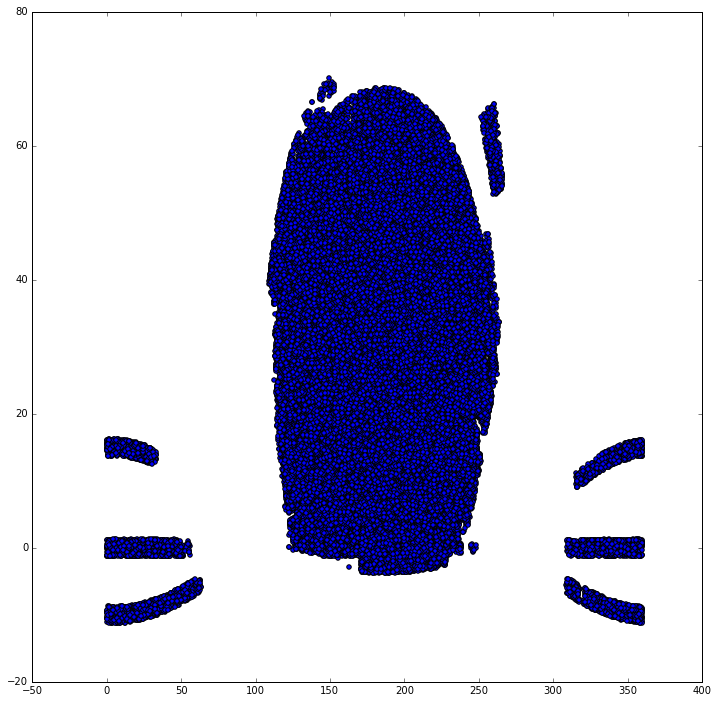

In [230]:
# positions of galaxy targets on the sky ()
plt.scatter(phot_df.ra,phot_df.dec)